In [3]:
# Helpful packages for working with images and factorizations
# using Pkg; Pkg.add("Images")
# using Pkg; Pkg.add("Interact")
# using Pkg; Pkg.add("ImageMagick") # And this allows us to load JPEG-encoded images
using Images, LinearAlgebra, Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/914c23191e59e3852d3d15cfe92655817e94228b-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/914c23191e59e3852d3d15cfe92655817e94228b-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

### Использование SVD для сжатия изображения

В этом упражнении мы будем использовать разложение по сингулярным числам (SVD) для сжатия изображения, чтобы мы могли хранить изображение, не сохраняя «ненужную» информацию. Для начала давайте определим разложение по единственному значению. В SVD мы берем матрицу $A$ и разлагаем ее так, чтобы

$$A = USV^T$$

где матрицы $U$ и $V$ являются унитарными и содержат наши особые векторы. Матрица $S$ диагональна и хранит наши сингулярные значения в порядке убывания сверху/слева, снизу/справа. В Джулии наши изображения хранятся в виде массивов, поэтому мы можем рассматривать их как матрицы

In [1]:
file = download("https://uploads6.wikiart.org/images/salvador-dali/the-persistence-of-memory-1931.jpg!Large.jpg")

"C:\\Users\\D395~1\\AppData\\Local\\Temp\\jl_CD7F.tmp"

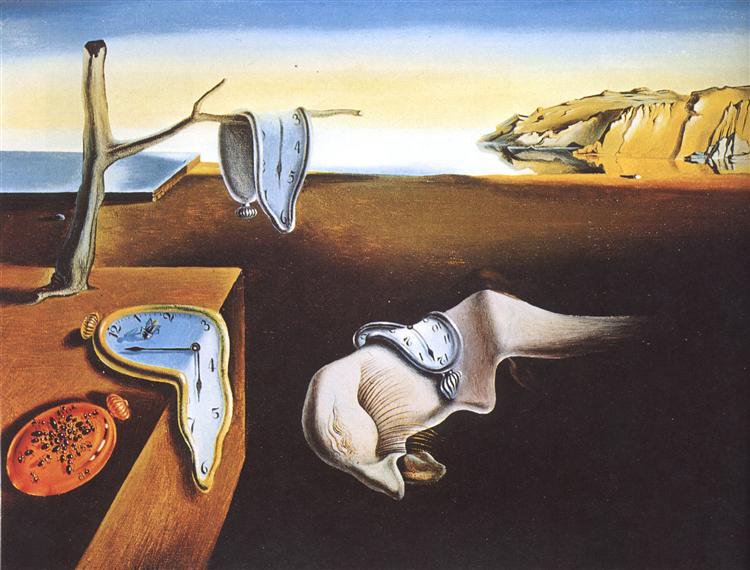

In [4]:
img = load(file)

In [4]:
size(img)

(570, 750)

In [11]:
img[245,280]

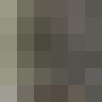

In [12]:
img[140:145,220:225] # Each element in the array is a color

In [13]:
dump(img[24,24])

RGB{Normed{UInt8,8}}
  r: Normed{UInt8,8}
    i: UInt8 0x8b
  g: Normed{UInt8,8}
    i: UInt8 0xa3
  b: Normed{UInt8,8}
    i: UInt8 0xc5


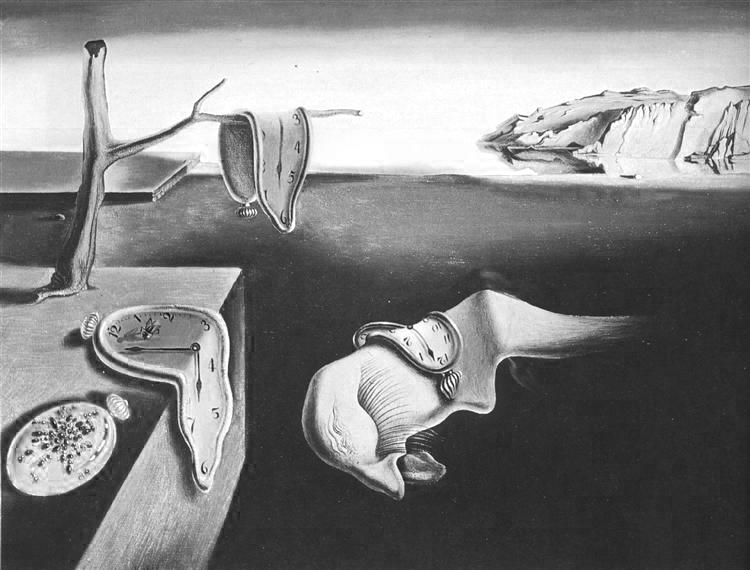

In [5]:
channels = Float64.(channelview(img))
Gray.(channels[1, :, :])

Это означает, что мы можем взять SVD этого изображения. Таким образом, мы можем хранить эту картинку банана как наборы сингулярных векторов и сингулярных значений. 

Это полезно, так как мы обнаружим, что нам не нужно отслеживать все особые векторы и все особые значения для хранения изображения, которое все еще выглядит как банан! Это означает, что мы можем хранить только важную информацию, отбрасывая остальную часть и тем самым «сжимая» изображение. 

Работать с изображениями в оттенках серого немного проще, поэтому давайте поработаем с серой версией этого банана.

Если мы не выбрасываем данные, то возвращаемся к тому, с чего начали:

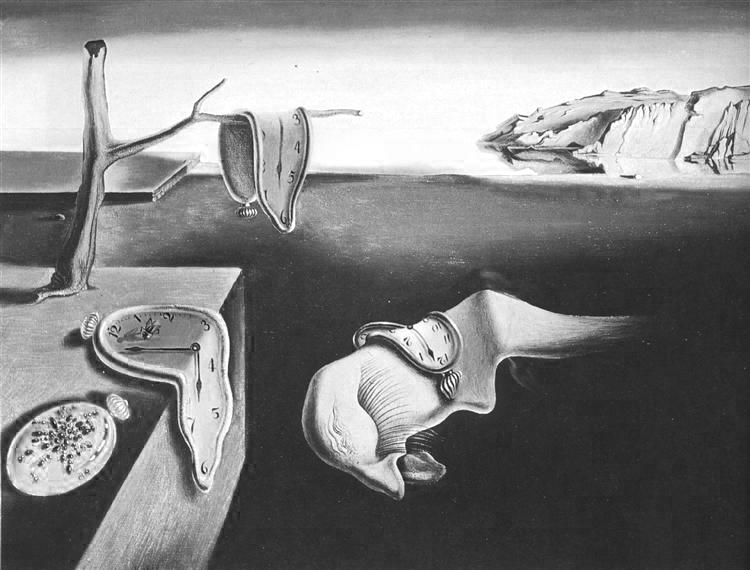

In [6]:
U, S, V = svd(channels[1,:,:])
Gray.(U * Diagonal(S) * V')

Ну, конечно, мы не делаем здесь никакого сжатия - размеры U, S и V больше, чем наша исходная матрица! Это как противоположность сжатия. Ключевым моментом является то, что значения хранятся в порядке убывания, поэтому мы можем начать отбрасывать ненужности.

In [17]:
sum(length.((U, S, V)))

752970

In [18]:
length(img)

427500

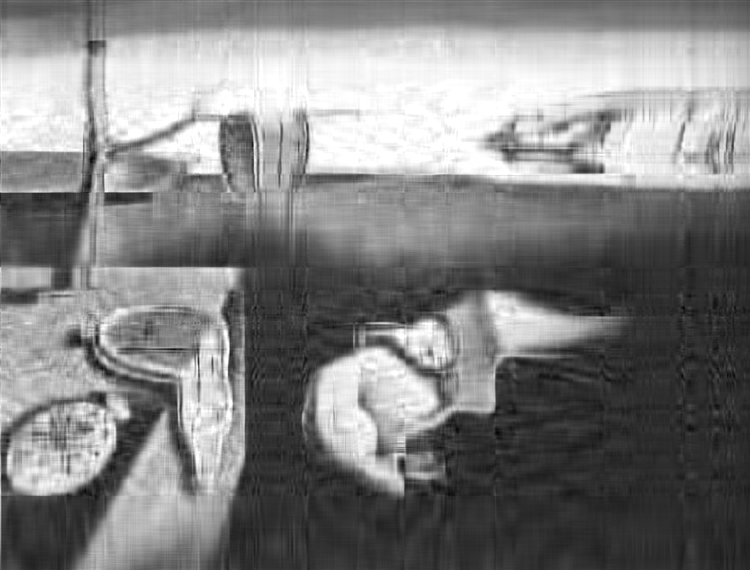

In [7]:
Gray.(U[:, 1:25] * Diagonal(S[1:25]) * V[:, 1:25]')

In [8]:
sum(length.((U[:, 1:25], S[1:25], V[:, 1:25])))/length(img)

0.0772514619883041

Конечно, это всего лишь один канал изображения. Давайте соберем все воедино и посмотрим, как мы можем сжать разные каналы, чтобы найти приемлемый уровень сжатия.

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:k1=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
50), Observable{Int64} with 2 listeners. Value:
50, Scope("knockout-component-68316cb3-973e-4a07-b62c-baae6c41b283", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k1"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Игорь\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Игорь\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Игорь\\.julia\\packages\\InteractBase\\PTCUD\\src\\..\\assets\\all.js", "C:\\Users\\Игорь\\.julia\\packages\\InteractBase\\PTCUD\\src\\..\\assets\\style.css", "C:\\Users\\Игорь\\.julia\\packages\\InteractBulma\\PH56C\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":50}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-68316cb3-973e-4a07-b62c-baae6c41b283\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-68316cb3-973e-4a07-b62c-baae6c41b283\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"
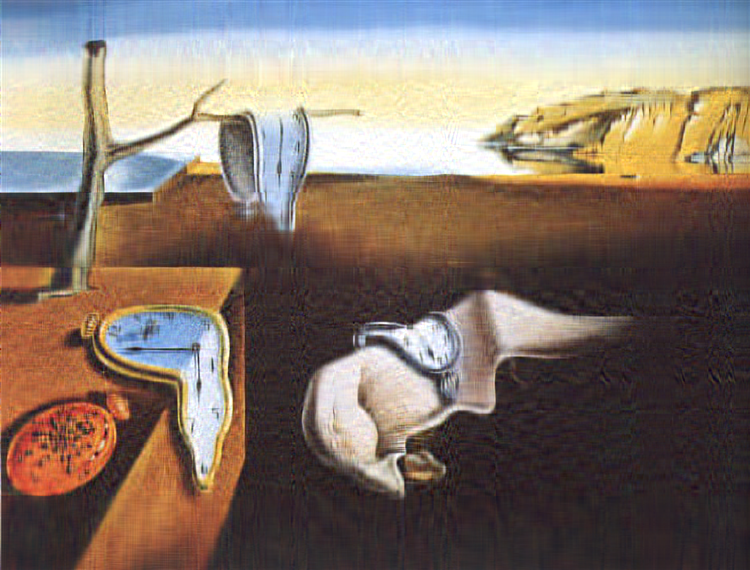
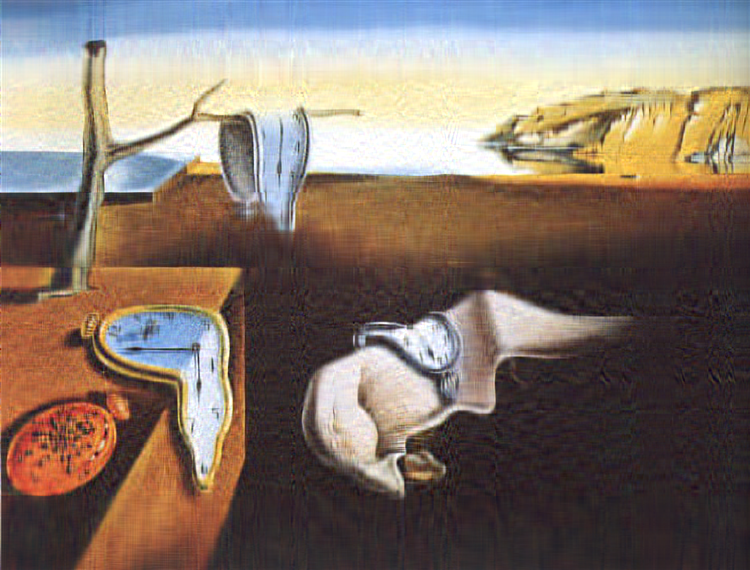

In [7]:
function rank_approx(M, k)
    U, S, V = svd(M)
    
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    
    M = min.(max.(M, 0.0), 1.)
end

n = 100
@manipulate for k1 in 1:n, k2 in 1:n, k3 in 1:n
    colorview(  RGB, 
                rank_approx(channels[1,:,:], k1),
                rank_approx(channels[2,:,:], k2),
                rank_approx(channels[3,:,:], k3)
    )
    end # ??? interact не отображается

**Итак, как мы можем использовать SVD, чтобы определить, какая информация на изображении действительно важна?**

Ответ кроется в сингулярных значениях!

Если у нас есть матрицы $U$, $S$, и $V$ Исходя из нашего изображения, мы можем восстановить это изображение с помощью матричного умножения $USV^T$. 

Взятие этого матричного произведения аналогично суммированию внешних произведений каждой соответствующей пары векторов из $ U $ и $ V $, масштабированных по сингулярному значению ($\sigma$) из $ S $. Другими словами, для (100 x 100) пиксельного изображения

$$A_{image} = USV^T = \sum_{i = 1}^{100} \sigma_i \mathbf{u_i}\mathbf{v_i'} $$

Every outer product $u_i * v_i'$ creates a (100 x 100) matrix. Here we're summing together one hundred (100 x 100) matrices in order to create the original matrix $A_{image}$. The matrices at the beginning of the series -- those that are scaled by **large** singular values -- will be **much** more important in recreating the original matrix $A_{image}$.

This means we can approximate $A_{image}$ as

$$A_{image} \approx \sum_{i = 1}^{n} \sigma_i \mathbf{u_i}\mathbf{v_i'}$$

where $n < 100$.


#### Упражнение

Напишите функцию под названием `compress_image`. Её входные аргументы должны быть изображением и фактором сжатия. Сжатое изображение в градациях серого должно отображаться при вызове `compress_image`.

Например,

```julia
compress_image("images/104_100.jpg", 33)
```

вернет сжатое изображение банана в градациях серого, построенного с использованием 3 особых значений. (Это изображение имеет 100 единичных значений, поэтому используйте `fld (100, 33)`, чтобы определить, сколько особенных значений следует сохранить. `Fld` выполняет `floor division`.)

*Намёки*: 

* Выполните SVD на «канале» изображения в градациях серого.
* In an empty input cell, execute `?svd` to find a function that wil perform an SVD for you.

In [ ]:
banana = Gray.(yellowbanana)

Note that `banana` is a (100 x 100) matrix that stores a pixel -- information about the color -- at each entry.

In [ ]:
size(banana)

If we take the `channelview` of `banana`, we'll see the numbers that describe the color at each point in the array:

In [ ]:
channelview(banana)

Note that you can call `Gray` on the `channelview` of an image to display the image!

In [ ]:
Gray.(channelview(banana))

**So how can we use a SVD to determine what information in an image is really important?**

The singular values tell us!

If we have matrices $U$, $S$, and $V$ from our image, we can rebuild that image with the matrix product $USV^T$. 

Taking this matrix product is the same as adding together the outer products of each corresponding pair of vectors from $U$ and $V$, scaled by a singular value ($\sigma$) from $S$. In other words, for a (100 x 100) pixel image,

$$A_{image} = USV^T = \sum_{i = 1}^{100} \sigma_i \mathbf{u_i}\mathbf{v_i'} $$

Every outer product $u_i * v_i'$ creates a (100 x 100) matrix. Here we're summing together one hundred (100 x 100) matrices in order to create the original matrix $A_{image}$. The matrices at the beginning of the series -- those that are scaled by **large** singular values -- will be **much** more important in recreating the original matrix $A_{image}$.

This means we can approximate $A_{image}$ as

$$A_{image} \approx \sum_{i = 1}^{n} \sigma_i \mathbf{u_i}\mathbf{v_i'}$$

where $n < 100$.

For example, if we rebuild our image of a banana using only 30 (instead of all 100) singular values, we get

<img src="images/banana_30svals.png" alt="Drawing" style="width: 100px;"/>

Using 10, 5, and then 3 singular values, we get

<img src="images/banana_10svals.png" alt="Drawing" style="width: 100px;"/>
<img src="images/banana_5svals.png" alt="Drawing" style="width: 100px;"/>
<img src="images/banana_3svals.png" alt="Drawing" style="width: 100px;"/>

#### Exercise

Write a function called `compress_image`. Its input arguments should be an image and the factor by which you want to compress the image. A compressed grayscale image should display when `compress_image` is called.

For example,

```julia
compress_image("images/104_100.jpg", 33)
```

will return a compressed image of a grayscale banana built using 3 singular values. (This image has 100 singular values, so use `fld(100, 33)` to determine how many singular values to keep. `fld` performs "floor" division.)

*Hints*: 

* Perform the SVD on the `channelview` of a grayscale image.
* In an empty input cell, execute `?svd` to find a function that wil perform an SVD for you.